In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
df1 = pd.read_csv("C:\\Users\\Zain\\Desktop\\diabetes\\End-to-End-Diabetes-Prediction-Application-Using-Machine-Learning-master\\diabetes.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Count')

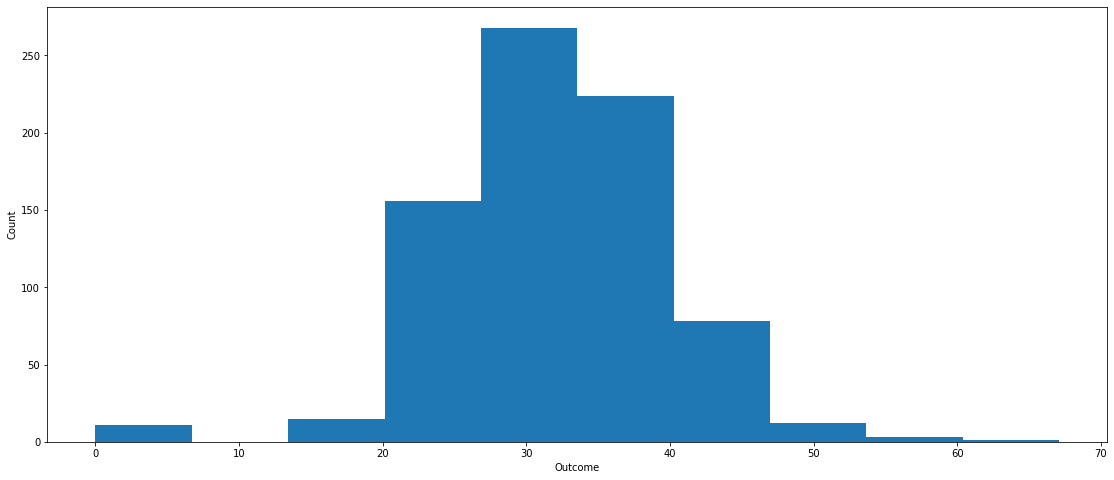

In [4]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (19,8)
plt.hist(df1.BMI,rwidth=1)
plt.xlabel("Outcome")
plt.ylabel("Count")

In [5]:
BMI_col= df1['BMI']

BMI_col.replace(to_replace = 0, value = BMI_col.mean(), inplace=True)

In [ ]:
s=df1['BMI']
[*s]

In [6]:
count = (df1['BMI'] == 0).sum()
print('Count of zeros in Column  BMI : ', count)

Count of zeros in Column  BMI :  0


In [7]:
df1['BMI'].value_counts()

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64

In [8]:
count = (df1['SkinThickness'] == 0).sum()
print('Count of zeros in Column SkinThickness  : ', count)

Count of zeros in Column SkinThickness  :  227


In [9]:
SkinThickness_col= df1['SkinThickness']
SkinThickness_col.replace(to_replace = 0, value = SkinThickness_col.mean(), inplace=True)

In [10]:
count = (df1['SkinThickness'] == 0).sum()
print('Count of zeros in Column SkinThickness  : ', count)

Count of zeros in Column SkinThickness  :  0


In [11]:
count = (df1['Insulin'] == 0).sum()
print('Count of zeros in Column insulin  : ', count)

Count of zeros in Column insulin  :  374


In [12]:
features = df1[['Pregnancies', 'Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]
target = df1['Outcome']

In [13]:
acc = []
model = []

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)

In [16]:
x = metrics.accuracy_score(Ytest, predicted_values)
x

0.7142857142857143

In [17]:
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  71.42857142857143


In [18]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       109
           1       0.51      0.62      0.56        45

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.74      0.71      0.72       154



In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
score = cross_val_score(DecisionTree, features, target, cv=cv)
score
np.average(score)

0.7662337662337663

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.7532467532467533
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.58      0.56      0.57        45

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154



In [21]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
score = cross_val_score(NaiveBayes,features,target,cv=cv)
score
np.average(score)

0.7922077922077921

In [22]:
import pickle
with open('Diabetes-NaiveBayes','wb') as f:
    pickle.dump(NaiveBayes,f)

In [23]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.7077922077922078
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       109
           1       0.00      0.00      0.00        45

    accuracy                           0.71       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.50      0.71      0.59       154



C:\Users\Zain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
score = cross_val_score(SVM,features,target,cv=cv)
np.average(score)


0.6948051948051948

In [68]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2, max_iter=1000)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.7727272727272727
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       109
           1       0.64      0.51      0.57        45

    accuracy                           0.77       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154



In [69]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
score = cross_val_score(LogReg,features,target,cv=cv)
np.average(score)

0.8311688311688312

In [70]:
import pickle
with open('Diabetes-LogReg.pickle','wb') as f:
    pickle.dump(LogReg,f)

In [71]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       109
           1       0.57      0.44      0.50        45

    accuracy                           0.74       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.73      0.74      0.73       154



In [72]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
score = cross_val_score(RF,features,target,cv=cv)
np.average(score)

0.7792207792207793

In [73]:
import pickle
with open('Diabetes-RF.pickle','wb') as f:
    pickle.dump(RF,f)

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

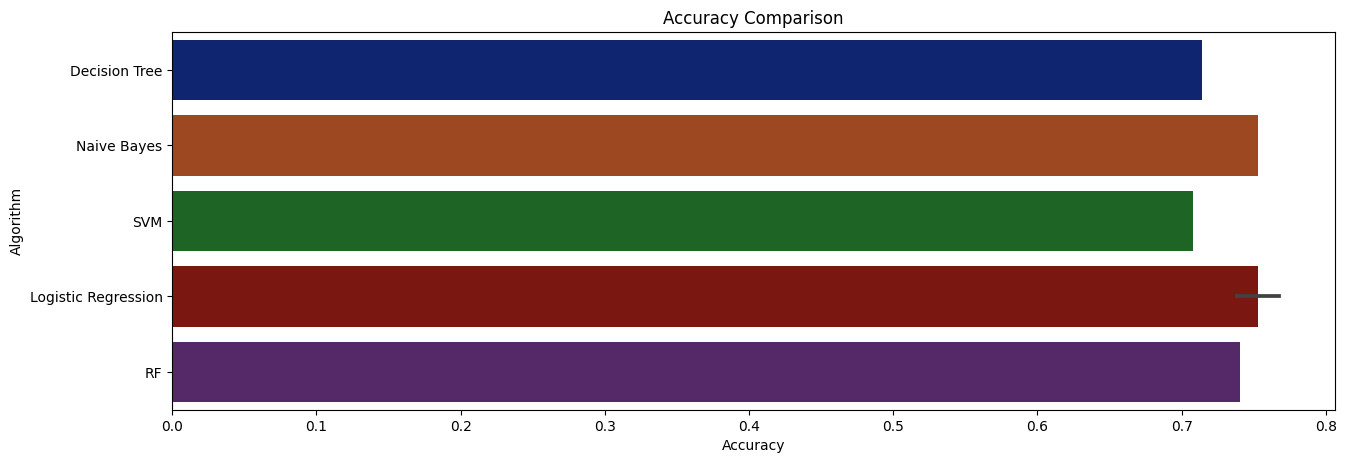

In [77]:
plt.figure(figsize=[15,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [78]:
accuracy_models = dict(zip(model, acc))
# print(model, acc)
for k, v in accuracy_models.items():
     print (k, '-->', v)

Decision Tree --> 0.7142857142857143
Naive Bayes --> 0.7532467532467533
SVM --> 0.7077922077922078
Logistic Regression --> 0.7727272727272727
RF --> 0.7402597402597403


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 13))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8020833333333334

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('GausNB', GaussianNB(var_smoothing= 0.77755654534))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7604166666666666

In [110]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
model_params = {
     'svm': {
        'model': svm.SVC(gamma='auto'),
         'params' : {
             'svc__C': [1,10,100,1000,500,300],
             'svc__kernel': ['rbf','linear']
         }  
     },
    
        'logistic_regression' : {
         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params': {
             'logisticregression__C': [1,5,10,12,15,14,17]
         }
     },
    
    'random_forest1': {
         'model': RandomForestClassifier(),
         'params' : {
             'randomforestclassifier__n_estimators': [1,5,10,15,20]
         }
     },
    
       

      'decision_tree': {
         'model': DecisionTreeClassifier(),
         'params': {
             'decisiontreeclassifier__criterion': ["gini","entropy","log_loss"]
            
         }
    
       },
    
    'GaussianNB':{
        'model':GaussianNB(),
        'params' :{
        'gaussiannb__var_smoothing':[1.23,4.33,2.56,34.3,44.2] 
        }
    
},
    
     'km': {
        'model': KMeans(),
        'params': {
            'kmeans__n_clusters': [1,2,3,4,5,6,7,8,9],
            
        }
        
    },
     'BernoulliNB':{
        'model': BernoulliNB(),
        'params' :{
            'bernoullinb__alpha': [1.1,10.2,20.55]
        }  
    }
}

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
# #     print(pipe)
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
#     print(clf)
    clf.fit(features,target)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [112]:
df

,model,best_score,best_params
0,svm,0.772176,"{'svc__C': 1000, 'svc__kernel': 'linear'}"
1,logistic_regression,0.773474,{'logisticregression__C': 1}
2,random_forest1,0.744877,{'randomforestclassifier__n_estimators': 20}
3,decision_tree,0.681037,{'decisiontreeclassifier__criterion': 'log_loss'}
4,GaussianNB,0.726594,{'gaussiannb__var_smoothing': 1.23}
5,km,-613.357836,{'kmeans__n_clusters': 9}
6,BernoulliNB,0.713539,{'bernoullinb__alpha': 10.2}


In [113]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1000, gamma='auto', kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'random_forest1': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=20))]),
 'decision_tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(criterion='log_loss'))]),
 'GaussianNB': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB(var_smoothing=1.23))]),
 'km': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kmeans', KMeans(n_clusters=9))]),
 'BernoulliNB': Pipeline(steps=[('standardscaler', StandardScaler()),


In [115]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8229166666666666

In [116]:
best_estimators['svm'].score(X_test,y_test)

0.8125

In [117]:
best_clf1 = best_estimators['logistic_regression']

In [118]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf1, 'logis_Reg_diabetes.pkl') 

['logis_Reg_diabetes.pkl']

In [119]:
import json
columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open("features_diabetes.json","w") as f:
    f.write(json.dumps(columns))